## **Random Forest**

In [1]:
# import libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [3]:
# load the data 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
# encode feature which are categorical or object using for lopp
le = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = le.fit_transform(df[i])
df.head()        

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [22]:
# split the data into X and y for classification 
X = df.drop('sex', axis = 1)
y = df['sex']

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# create , train and predict the model
model = RandomForestClassifier(n_estimators= 100, criterion='entropy', 
                               max_depth = 10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate the model
print('accuracy score:' , accuracy_score(y_test, y_pred))
print('confusion_matrix: ', confusion_matrix(y_test, y_pred))
print('classification report: ', classification_report(y_test, y_pred))

accuracy score: 0.6530612244897959
confusion_matrix:  [[ 6 13]
 [ 4 26]]
classification report:                precision    recall  f1-score   support

           0       0.60      0.32      0.41        19
           1       0.67      0.87      0.75        30

    accuracy                           0.65        49
   macro avg       0.63      0.59      0.58        49
weighted avg       0.64      0.65      0.62        49



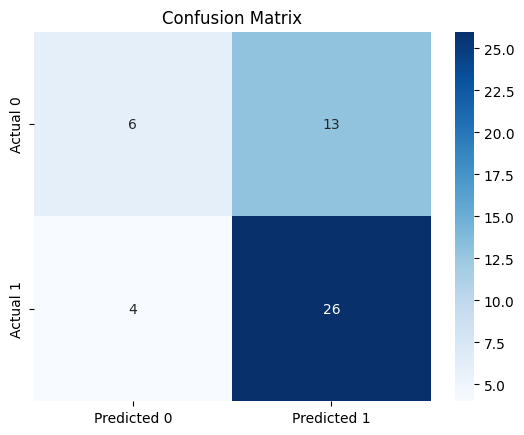

In [23]:
# graph for classification_report 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()


**True Positives (TP): 26 instances were correctly predicted as class 1.**

**True Negatives (TN): 6 instances were correctly predicted as class 0.**

**False Positives (FP): 13 instances were incorrectly predicted as class 1.**

**False Negatives (FN): 4 instances were incorrectly predicted as class 0.**

In [26]:
# Use random forest for Regression task
X = df.drop('tip', axis = 1)
y = df['tip']

# train test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

# create , train and predict the model
model = RandomForestRegressor(n_estimators= 100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# evaluate the model
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
print('mean absolute_error: ', mean_absolute_error(y_test, y_pred))
print('r2 score: ', r2_score(y_test, y_pred))
print('root mean squared error: ', np.sqrt(mean_squared_error(y_test, y_pred)))


mean_squared_error:  0.9625607446938791
mean absolute_error:  0.7750510204081635
r2 score:  0.2299337514142753
root mean squared error:  0.9811018013916186
